## 读数据看（已经用ViennaRNA包算出自由能和点括号表达方式）

In [1]:
import pandas as pd
df = pd.read_csv('/Users/ekeulseuji-/Downloads/miRBasev21.csv')
df = df.drop(df.columns[0], axis=1) # drop the first column containing the order numbers

In [2]:
print(df.head())

   hairpin_name                                        hairpin_seq  \
0  hsa-let-7a-1  UGGGAUGAGGUAGUAGGUUGUAUAGUUUUAGGGUCACACCCACCAC...   
1  hsa-let-7a-2  AGGUUGAGGUAGUAGGUUGUAUAGUUUAGAAUUACAUCAAGGGAGA...   
2  hsa-let-7a-3  GGGUGAGGUAGUAGGUUGUAUAGUUUGGGGCUCUGCCCUGCUAUGG...   
3    hsa-let-7b  CGGGGUGAGGUAGUAGGUUGUGUGGUUUCAGGGCAGUGAUGUUGCC...   
4    hsa-let-7c  GCAUCCGGGUUGAGGUAGUAGGUUGUAUGGUUUAGAGUUACACCCU...   

                                          dotbracket    fe          arm5p  \
0  (((((.(((((((((((((((((((((.....(((...((((....... -34.2  hsa-let-7a-5p   
1  (((..(((.(((.(((((((((((((.........(((......))... -25.2  hsa-let-7a-5p   
2  (((.(((((((((((((((((((((((((((...))))))......... -34.1  hsa-let-7a-5p   
3  (((((.(((((((((((((((((((((((.((((((.....)))))... -46.7  hsa-let-7b-5p   
4  ((.((((((..(((.(((.(((((((((((((..((.(..((...)... -31.6  hsa-let-7c-5p   

             mature5p_seq            arm3p            mature3p_seq  class  
0  UGAGGUAGUAGGUUGUAUAGUU    hsa-let-7a-

In [3]:
# heading解释：

# hairpin_name 是 Pre-miRNA分子的id

# hairpin_seq  是 Pre-miRNA序列的具体结构 由AUGC组成 

#                                                                 5' UUC-AUACAAU-UAUUGGCCUCA 3'
# dotbracket   是 根据pair types得到的双链结构表示方法 比如这样            |.|-|||.-.-|-|||||-|||||
#                                                                 3' AUGUUAUA-AUGUAUGAU-GGAGU 5'

# fe           是 利用 ViennaRNA Package中的RNAfold计算得到的 Hairpin free energy 自由能

# arm5p        是 对应的Pre-miRNA序列切割后含mature 5p'序列的单链RNA分子id

# mature5p_seq 是 pre-miRNA在细胞质里被 Dicer酶识别并被剪断成短双链 miRNA分子之后
#                 AGO2蛋白和 Dicer解开并切割成的两个单链RNA分子之一所包含的 mature 5p'序列 由AUGC组成

# arm3p        是 对应的Pre-miRNA序列切割后含mature 3p'序列的单链RNA分子id

# mature3p_seq 是 pre-miRNA在细胞质里被 Dicer酶识别并被剪断成短双链 miRNA分子之后
#                 AGO2蛋白和 Dicer解开并切割成的两个单链RNA分子之一所包含的 mature 3p'序列 由AUGC组成

# class        是 类别 FALSE就说明 Pre-miRNA分子属于 Canonical miRNA （一共有507个）
#                     TRUE就说明 Pre-miRNA分子属于 Mirtrons （一共有216个）

In [4]:
# 转换成包含特征和目标分类的数据集（一共25个特征）

# harpin_fe    是 利用 ViennaRNA Package中的 RNAfold计算得到的 Harpin free energy 自由能（原样保留）

# harpin_len   是 Pre-miRNA长度（就是计算序列中包含多少个字母或核苷酸）

# mature5p_len 是 包含 mature 5p序列的单链RNA长度（就是计算序列中包含多少个字母或核苷酸）

# mature3p_len 是 包含 mature 3p序列的单链RNA长度（就是计算序列中包含多少个字母或核苷酸）

# interarm_len 是 arm5p和arm3p序列之间的单链RNA长度（就是计算harpin_len - mature5p_len - mature3p_len）

# n_short_loop 是 长度小于4个核苷酸的环状结构的数量

# n_long_loop  是 长度大于等于4个核苷酸的环状结构的数量

# overhang_len 是 过挂长度 (harpin中茎部未配对核苷酸的数量) (就是计算 (mature5p_len - mature3p_len))
#                 正值表示5'过挂 负值表示3'过挂（表示茎部未配对核苷酸数量的差异）

# terminal_len 是 末端环长度 （harpin中茎部末端未配对核苷酸形成的环状结构的长度）

# mature5p_A   是 包含 mature 5p序列的单链RNA里面的 A content（就是计算序列中包含多少个字母A）
# mature3p_A   是 包含 mature 3p序列的单链RNA里面的 A content（就是计算序列中包含多少个字母A）
# interarm_A   是 arm5p和arm3p序列之间的单链RNA里面的 A content（就是计算序列中包含多少个字母A）
# harpin_A     是 整个发夹结构里面的 A content（就是计算序列中包含多少个字母A）

# mature5p_U   是 包含 mature 5p序列的单链RNA里面的 U content（就是计算序列中包含多少个字母U）
# mature3p_U   是 包含 mature 3p序列的单链RNA里面的 U content（就是计算序列中包含多少个字母U）
# interarm_U   是 arm5p和arm3p序列之间的单链RNA里面的 U content（就是计算序列中包含多少个字母U）
# harpin_U     是 整个发夹结构里面的 U content（就是计算序列中包含多少个字母U）

# mature5p_G   是 包含 mature 5p序列的单链RNA里面的 G content（就是计算序列中包含多少个字母G）
# mature3p_G   是 包含 mature 3p序列的单链RNA里面的 G content（就是计算序列中包含多少个字母G）
# interarm_G   是 arm5p和arm3p序列之间的单链RNA里面的 G content（就是计算序列中包含多少个字母G）
# harpin_G     是 整个发夹结构里面的 G content（就是计算序列中包含多少个字母G）

# mature5p_C   是 包含 mature 5p序列的单链RNA里面的 C content（就是计算序列中包含多少个字母C）
# mature3p_C   是 包含 mature 3p序列的单链RNA里面的 C content（就是计算序列中包含多少个字母C）
# interarm_C   是 arm5p和arm3p序列之间的单链RNA里面的 C content（就是计算序列中包含多少个字母C）
# harpin_C     是 整个发夹结构里面的 C content（就是计算序列中包含多少个字母C）


## 把原数据拆成能用的特征

In [5]:
# 建新的 dataframe
new_df = pd.DataFrame()

# 添加特征列

# 保持原样 harpin自由能
new_df['harpin_fe'] = df['fe']

# 发夹和两个mature部分的长度
new_df['harpin_len'] = df['hairpin_seq'].apply(len)
new_df['mature5p_len'] = df['mature5p_seq'].apply(len)
new_df['mature3p_len'] = df['mature3p_seq'].apply(len)

# harpin序列中非mature5p和mature3p序列的长度
new_df['interarm_len'] = new_df['harpin_len'] - new_df['mature5p_len'] - new_df['mature3p_len']

# dotbracket中短环的数量（计算dotbracket中 '.' '-' 和 '|' 的数量）
new_df['n_short_loop'] = df['dotbracket'].apply(lambda x: x.count('.') + x.count('-') + x.count('|'))

# dotbracket中长环的数量 （计算dotbracket中 '|||' '||'和 '|-|'的数量）
new_df['n_long_loop'] = df['dotbracket'].apply(lambda x: x.count('|||') + x.count('||') + x.count('|-|'))

# 过挂长度
new_df['overhang_len'] = new_df['mature5p_len'] - new_df['mature3p_len']

# 未配对核苷酸形成环状结构的长度（计算dotbracket中第一个分隔符之前的长度）
# 如果dotbracket中有出现分隔符 '-' 则使用分隔符之前的字符串长度作为结果/否则结果为0
new_df['terminal_len'] = df['dotbracket'].apply(lambda x: len(x.split('-')[0]) if '-' in x else 0)

# 发夹和两个mature部分的 A含量
new_df['mature5p_A'] = df['mature5p_seq'].apply(lambda x: x.count('A'))
new_df['mature3p_A'] = df['mature3p_seq'].apply(lambda x: x.count('A'))
new_df['harpin_A'] = df['hairpin_seq'].apply(lambda x: x.count('A'))

# harpin序列中非mature5p和mature3p序列的 A含量
new_df['interarm_A'] = new_df['harpin_A'] - new_df['mature5p_A'] - new_df['mature3p_A']

# 发夹和两个mature部分的 U含量
new_df['mature5p_U'] = df['mature5p_seq'].apply(lambda x: x.count('U'))
new_df['mature3p_U'] = df['mature3p_seq'].apply(lambda x: x.count('U'))
new_df['harpin_U'] = df['hairpin_seq'].apply(lambda x: x.count('U'))

# harpin序列中非mature5p和mature3p序列的 U含量
new_df['interarm_U'] = new_df['harpin_U'] - new_df['mature5p_U'] - new_df['mature3p_U']

# 发夹和两个mature部分的 G含量
new_df['mature5p_G'] = df['mature5p_seq'].apply(lambda x: x.count('G'))
new_df['mature3p_G'] = df['mature3p_seq'].apply(lambda x: x.count('G'))
new_df['harpin_G'] = df['hairpin_seq'].apply(lambda x: x.count('G'))

# harpin序列中非mature5p和mature3p序列的 G含量
new_df['interarm_G'] = new_df['harpin_G'] - new_df['mature5p_G'] - new_df['mature3p_G']

# 发夹和两个mature部分的 C含量
new_df['mature5p_C'] = df['mature5p_seq'].apply(lambda x: x.count('C'))
new_df['mature3p_C'] = df['mature3p_seq'].apply(lambda x: x.count('C'))
new_df['harpin_C'] = df['hairpin_seq'].apply(lambda x: x.count('C'))

# harpin序列中非mature5p和mature3p序列的 C含量
new_df['interarm_C'] = new_df['harpin_C'] - new_df['mature5p_C'] - new_df['mature3p_C']

# 保持原样 pre-miRNA的分类
new_df['class'] = df['class']

In [6]:
print(new_df.head())

   harpin_fe  harpin_len  mature5p_len  mature3p_len  interarm_len  \
0      -34.2          80            22            21            37   
1      -25.2          72            22            22            28   
2      -34.1          74            22            21            31   
3      -46.7          83            22            22            39   
4      -31.6          84            22            22            40   

   n_short_loop  n_long_loop  overhang_len  terminal_len  mature5p_A  ...  \
0            14            0             1             0           5  ...   
1            22            0             0             0           5  ...   
2            14            0             1             0           5  ...   
3            15            0             0             0           3  ...   
4            20            0             0             0           4  ...   

   interarm_U  mature5p_G  mature3p_G  harpin_G  interarm_G  mature5p_C  \
0           7           8           1    

## 做特征选择

In [7]:
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LinearRegression, LogisticRegression # 线性回归/逻辑回归
from sklearn.feature_selection import SequentialFeatureSelector as SFS # 顺序特征选择
from sklearn.ensemble import RandomForestClassifier # 随机森林
from sklearn.tree import DecisionTreeClassifier as DTC, plot_tree  # 决策树
from sklearn.preprocessing import StandardScaler # 不一定用
from sklearn.model_selection import StratifiedKFold, train_test_split, GridSearchCV  # 划分数据集/选超参的吧

# 对比模型表现的标准
from sklearn.metrics import roc_auc_score, f1_score, precision_score, recall_score
from sklearn.metrics import accuracy_score, average_precision_score, confusion_matrix 

# 数学用 画图用
import numpy as np 
import matplotlib.pyplot as plt

In [8]:
# 特征列 independent variables 
X = new_df.iloc[:, :-1]  

# 目标类别列 TRUE/FALSE target variable
y = new_df['class']  

# 划分 训练集：验证集：测试集
#       6  ：  2  ：  2

# 训练集+验证集 8：2 测试集
X_tv, X_test, y_tv, y_test = train_test_split(X, y, test_size=0.2, random_state=10086)

# 训练集 4：1 验证集（剩下8份里面）
X_train, X_val, y_train, y_val = train_test_split(X_tv, y_tv, test_size=0.25, random_state=100)

### 线性回归特征选择

In [9]:
# 建+拟合线性模型 linear model
Linear_Sel = SelectFromModel(LinearRegression())
Linear_Sel = Linear_Sel.fit(X_train, y_train)

# 拟合线性模型的系数 (用它的平均值作为阈值)
Linear_Sel.estimator_.coef_

# 选择下来的特征存到 Features_Kept_Linear
Features_Kept_Linear = X_train.columns[Linear_Sel.get_support()]
print(Features_Kept_Linear) # 看一眼

# 选择下来的特征自己成一组数据
linX_train = X_train.loc[:, Features_Kept_Linear]
linX_val = X_val.loc[:, Features_Kept_Linear]

Index(['harpin_len', 'mature5p_len', 'mature3p_len', 'interarm_len',
       'harpin_A', 'harpin_U', 'harpin_G', 'harpin_C'],
      dtype='object')


### 逻辑回归L1 特征选择

In [10]:
# 建+拟合逻辑回归模型 logistic model（L1 penalty）
Logi_L1_Sel = SelectFromModel(LogisticRegression(penalty='l1', C=0.1, solver='liblinear'))
Logi_L1_Sel = Logi_L1_Sel.fit(X_train, y_train)

# 逻辑回归拟合模型的系数 (用它的平均值作为阈值)
Logi_L1_Sel.estimator_.coef_
np.mean(np.abs(Logi_L1_Sel.estimator_.coef_))

# 选择下来的特征存到 Features_Kept_Logi_L1
Features_Kept_Logi_L1 = X_train.columns[Logi_L1_Sel.get_support()]
print(Features_Kept_Logi_L1)

# 选择下来的特征自己成一组数据
l1X_train = X_train.loc[:, Features_Kept_Logi_L1]
l1X_val = X_val.loc[:, Features_Kept_Logi_L1]

Index(['harpin_fe', 'mature5p_len', 'n_short_loop', 'overhang_len',
       'mature3p_A', 'harpin_A', 'mature3p_U', 'interarm_U', 'mature5p_G',
       'mature3p_G', 'mature5p_C', 'mature3p_C'],
      dtype='object')


### 逻辑回归L2 特征选择

In [11]:
# 建+拟合逻辑回归模型 logistic model（L2 penalty）
Logi_L2_Sel = SelectFromModel(LogisticRegression(penalty='l2', C=0.1, solver='liblinear'))
Logi_L2_Sel = Logi_L2_Sel.fit(X_train, y_train)

# 逻辑回归拟合模型的系数 (用它的平均值作为阈值)
Logi_L2_Sel.estimator_.coef_
np.mean(np.abs(Logi_L2_Sel.estimator_.coef_))

# 选择下来的特征存到 Features_Kept_Logi_L2
Features_Kept_Logi_L2 = X_train.columns[Logi_L2_Sel.get_support()]
print(Features_Kept_Logi_L2)

# 选择下来的特征自己成一组数据
l2X_train = X_train.loc[:, Features_Kept_Logi_L2]
l2X_val = X_val.loc[:, Features_Kept_Logi_L2]

Index(['harpin_fe', 'n_short_loop', 'mature3p_A', 'harpin_A', 'interarm_A',
       'mature3p_U', 'mature5p_G', 'mature3p_G', 'harpin_G', 'mature5p_C',
       'mature3p_C'],
      dtype='object')


### 逻辑回归L2 前向特征选择

In [12]:
# 建+拟合逻辑回归模型 logistic model（L2 penalty）
Logistic_Sel = LogisticRegression(penalty='l2', C=0.01, solver='liblinear')
Logistic_Sel.fit(X_train, y_train)

# 前向特征选择 forward feature selection (选和线性回归选出来差不多个数的特征)
Forward_Sel = SFS(Logistic_Sel, n_features_to_select=13, direction='forward').fit(X_train, y_train)

# 选择下来的特征存到 Features_Kept_Linear
Features_Kept_Forward = Forward_Sel.get_feature_names_out()
print(Features_Kept_Forward) # 看一眼

# 选择下来的特征自己成一组数据
fwX_train = X_train.loc[:, Features_Kept_Forward]
fwX_val = X_val.loc[:, Features_Kept_Forward]

['harpin_fe' 'harpin_len' 'n_short_loop' 'n_long_loop' 'overhang_len'
 'terminal_len' 'mature5p_A' 'interarm_A' 'mature3p_U' 'interarm_U'
 'mature5p_G' 'harpin_G' 'mature3p_C']


### 逻辑回归L2 反向特征选择

In [13]:
# 反向特征选择 backward feature selection (选和线性回归选出来差不多个数的特征)
Backward_Sel = SFS(Logistic_Sel, n_features_to_select=13, direction='backward').fit(X_train, y_train)

# 选择下来的特征存到 Features_Kept_Backward
Features_Kept_Backward = Backward_Sel.get_feature_names_out()
print(Features_Kept_Backward)

# 选择下来的特征自己成一组数据
bwX_train = X_train.loc[:, Features_Kept_Backward]
bwX_val = X_val.loc[:, Features_Kept_Backward]

['interarm_len' 'n_short_loop' 'mature3p_A' 'harpin_A' 'interarm_A'
 'mature5p_U' 'mature3p_U' 'harpin_U' 'mature5p_G' 'mature3p_G'
 'mature5p_C' 'harpin_C' 'interarm_C']


### 随机森林 特征重要度排序

In [14]:
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']

(-1.0, 25.0)

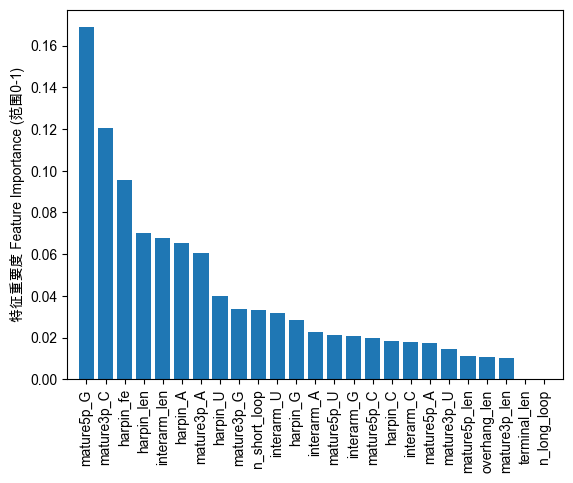

In [15]:
# 建+拟合随机森林模型 random forest
Forest = RandomForestClassifier(n_estimators=500, random_state=10086)
Forest.fit(X_train, y_train)

# 算特征重要度
Importances = Forest.feature_importances_ 

# 重要度由高到低排序
Indices = np.argsort(Importances)[::-1]  

# 柱状图可视化重要度
plt.ylabel('特征重要度 Feature Importance (范围0-1)')
plt.bar(range(X_train.shape[1]), Importances[Indices], align='center')

# 调整每个bar的间距
Labels = new_df.columns[:-1] # 写上特征的列名
plt.xticks(range(X_train.shape[1]), Labels[Indices], rotation=90)  
plt.xlim([-1, X_train.shape[1]])

In [16]:
# 看图的话就选12个好了
Features_Kept_Forest = Labels[Indices[:12]]
print(Features_Kept_Forest)

# 选择下来的特征自己成一组数据
foX_train = X_train.loc[:, Features_Kept_Forest]
foX_val = X_val.loc[:, Features_Kept_Forest]

Index(['mature5p_G', 'mature3p_C', 'harpin_fe', 'harpin_len', 'interarm_len',
       'harpin_A', 'mature3p_A', 'harpin_U', 'mature3p_G', 'n_short_loop',
       'interarm_U', 'harpin_G'],
      dtype='object')


## 特征选择好了

## 用SVM做基线模型 然后在选择过的特征集里面进行验证集表现比较

In [17]:
from sklearn.svm import SVC

def SVM_Baseline(X_train, X_val, y_train, y_val):
    
    # 建+拟合SVM
    svm = SVC(random_state=100)
    svm.fit(X_train, y_train)
    
    # 在验证集上做预测
    y_pred = svm.predict(X_val)
    
    # 算表现！
    print('Average Precision:', average_precision_score(y_val, y_pred))
    print('AUROC:', roc_auc_score(y_val, y_pred))
    print("Accuracy:", accuracy_score(y_val, y_pred))  

### 原始数据集 表现数据

In [18]:
SVM_Baseline(X_train, X_val, y_train, y_val)

Average Precision: 0.6592058444999622
AUROC: 0.8277555777555777
Accuracy: 0.9027027027027027


### 线性回归 特征选择 表现数据

In [19]:
SVM_Baseline(linX_train, linX_val, y_train, y_val)

Average Precision: 0.4922350922350922
AUROC: 0.7339327339327338
Accuracy: 0.8486486486486486


### 逻辑回归L1 特征选择 表现数据

In [20]:
SVM_Baseline(l1X_train, l1X_val, y_train, y_val)

Average Precision: 0.7142155142155142
AUROC: 0.8466533466533468
Accuracy: 0.918918918918919


### 逻辑回归L2 特征选择 表现数据

In [21]:
SVM_Baseline(l2X_train, l2X_val, y_train, y_val)

Average Precision: 0.6960143178893179
AUROC: 0.8347485847485848
Accuracy: 0.9135135135135135


### 逻辑回归L2 前向特征选择 表现数据

In [22]:
SVM_Baseline(fwX_train, fwX_val, y_train, y_val)

Average Precision: 0.6770523770523771
AUROC: 0.8312520812520812
Accuracy: 0.9081081081081082


### 逻辑回归L2 反向特征选择 表现数据

In [23]:
SVM_Baseline(bwX_train, bwX_val, y_train, y_val)

Average Precision: 0.712998712998713
AUROC: 0.8634698634698634
Accuracy: 0.918918918918919


### 随机森林 特征重要度排序选择 表现数据

In [24]:
SVM_Baseline(foX_train, foX_val, y_train, y_val)

Average Precision: 0.6592058444999622
AUROC: 0.8277555777555777
Accuracy: 0.9027027027027027


## 综合选择  逻辑回归L2 反向特征选择 选出来的特征

In [25]:
# 从之前的df中剔除不需要的特征列
new_df_selected = new_df[Features_Kept_Backward]

# 把target class合并进来
new_df_selected.loc[:, 'class'] = new_df['class']

# 看一眼
print(new_df_selected.head())

   interarm_len  n_short_loop  mature3p_A  harpin_A  interarm_A  mature5p_U  \
0            37            14           5        21          11           9   
1            28            22           3        20          12           9   
2            31            14           5        14           4           9   
3            39            15           5        16           8           9   
4            40            20           4        17           9           9   

   mature3p_U  harpin_U  mature5p_G  mature3p_G  mature5p_C  harpin_C  \
0           9        25           8           1           0        15   
1           7        23           8           3           0        11   
2           9        26           8           1           0        13   
3           6        23          10           1           0        18   
4           8        27           9           2           0        16   

   interarm_C  class  
0           9  False  
1           2  False  
2           7  Fa

/var/folders/f4/9pgpjgrn50l2prhgfp_2r9000000gn/T/ipykernel_36599/2336993071.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df_selected.loc[:, 'class'] = new_df['class']


# 用GA-BP模型

In [26]:
new_X_train = X_train[Features_Kept_Backward]
new_X_val = X_val[Features_Kept_Backward]
new_X_test = X_test[Features_Kept_Backward]

In [27]:
import torch
import pygad
import torchga
import numpy

from sklearn.metrics import confusion_matrix
import seaborn as sns

# 存每代的损失和准确率
losses = []
accuracies = []

In [28]:
# 流程

# 初始化种群：用遗传算法的idea 随机生成一组初始的神经网络权重和偏置的种群

# 评估适应度：对每个个体（即神经网络）用反向传播算法计算其在训练集上的损失函数值 并将其作为适应度评估个体的优劣
# 选择操作：根据适应度值 使用选择算子（如轮盘赌选择 各个个体被选中的概率和适应度函数成正比）从种群中选出一部分个体作为母代
# 交叉操作：对于选中的母代个体 使用交叉算子（如单点交叉或多点交叉）生成新的子代个体
# 变异操作：对于生成的子代个体 使用变异算子（如位变异或高斯变异）对其进行随机变异（增加种群的多样性）
# 更新种群：把母代和子代个体合并形成新的种群
# （重复前面五个步骤直到达到停止条件（如达到最大迭代次数或达到期望的适应度值））

# 选择最优个体：根据适应度值选择种群中适应度最好的个体作为最终的神经网络模型
# 使用最优个体进行预测：用选择出的最优个体进行测试集上的预测评估模型的性能

### 获取适应度（适应度方程）

In [29]:
def fitness_func(ga_instanse, solution, sol_idx):
    global data_inputs, data_outputs, torch_ga, model, loss_function
    
    predictions = torch.sigmoid(torchga.predict(model=model, solution=solution, data=data_inputs))

    # predictions = torchga.predict(model=model, solution=solution, data=data_inputs)

    solution_fitness = 1.0 / (loss_function(predictions, data_outputs).detach().numpy() + 0.00000001)

    return solution_fitness

### 在每代遗传算法进化过程中 输出当前的世代数和适应度 而且存一下损失和准确率方便之后画折线

In [30]:
def callback_generation(ga_instance):
    
    print('Generation = {generation}'.format(generation=ga_instance.generations_completed))
    print('Fitness    = {fitness}'.format(fitness=ga_instance.best_solution()[1]))
    
    # 存每代的损失和准确率
    # losses = []
    # accuracies = []
    
    # 当前最佳权重
    best_solution_weights = torchga.model_weights_as_dict(model=model, weights_vector=ga_instance.best_solution()[0])
    
    # 用到神经网络里 用验证集算损失和准确率
    model.load_state_dict(best_solution_weights)
    
    # 在每一代结束时进行验证 
    # 验证集输入
    val_inputs = torch.from_numpy(new_X_val.values).float()
    
    val_outputs = torch.from_numpy(y_val.values).float()
    val_outputs= val_outputs.reshape((val_outputs.shape[0], 1))
    
    # 进行预测 这里 val_predictions输出的是概率 然后用BCEWithLogitsLoss()算了损失
    val_predictions = model(val_inputs)
    val_loss = loss_function(val_predictions, val_outputs).detach().numpy()
    
    # 将概率值转换为包含0和1的预测目标列
    val_predicted_labels = (val_predictions >= threshold).int()
    val_true_labels = val_outputs
    val_accuracy = (val_predicted_labels == val_true_labels).sum().item() / len(val_true_labels)
    
    # val_accuracy = torch.sum(torch.max(val_predictions, axis=1).indices == val_outputs) / len(val_outputs)
    
    print('Val Loss:', val_loss)
    print('Val Accuracy:', val_accuracy)

    
    losses.append(val_loss)
    accuracies.append(val_accuracy)

### BP神经网络主函数

In [31]:
input_layer = torch.nn.Linear(in_features=13, out_features=5)
relu_layer1 = torch.nn.ReLU()

dense_layer = torch.nn.Linear(in_features=5, out_features=3)
relu_layer2 = torch.nn.ReLU()

output_layer = torch.nn.Linear(in_features=3, out_features=1)

sigmoid_layer = torch.nn.Sigmoid()

model = torch.nn.Sequential(input_layer,
                            relu_layer1,
                            dense_layer,
                            relu_layer2,
                            output_layer,
                            sigmoid_layer)

# 建pygad.torchga.TorchGA类的实例 产生初始种群（num_solutions=10表示初始种群将包含10个个体）
torch_ga = torchga.TorchGA(model=model,
                           num_solutions=10)

loss_function = torch.nn.BCEWithLogitsLoss()

### 输入/输出数据

In [32]:
# 将输入数据转换为张量并进行形状调整
data_inputs = torch.from_numpy(new_X_train.values).float()
# data_inputs = data_inputs.reshape((data_inputs.shape[0], 1, 1, data_inputs.shape[1]))

# 将输出数据转换为张量
data_outputs = torch.from_numpy(y_train.values).float()
data_outputs= data_outputs.reshape((data_outputs.shape[0], 1))

In [33]:
# data_inputs

In [34]:
# data_outputs

### PyGAD 参数设置

In [35]:
# 进化代数
num_generations = 700

# 在备选池中被选为亲本的解（个体）的数量
num_parents_mating = 6

# 初始种群（初始网络权重）
initial_population = torch_ga.population_weights 

# 设置阈值 预测值大于这个就是分类成1 小于就分类成0
threshold = 0.5

# 选择算子的类型 rws是轮盘赌选择 Roulette Wheel Selection
parent_selection_type = 'rws'

# 交叉算子类型 单点交叉
crossover_type = 'single_point'

# 变异算子类型 随机变异
mutation_type = 'random'

# 设置基因突变的百分比
mutation_percent_genes = 12

# 下一世代的种群要保留的父母代数量
# （-1表示保留所有父母 0表示不保留任何父母）
keep_parents = -1 

### 建一个 pygad.GA 类下的实例 ga_instance

In [36]:
ga_instance = pygad.GA(num_generations=num_generations,
                       num_parents_mating=num_parents_mating,
                       initial_population=initial_population,
                       fitness_func=fitness_func,
                       parent_selection_type=parent_selection_type,
                       crossover_type=crossover_type,
                       mutation_type=mutation_type,
                       mutation_percent_genes=mutation_percent_genes,
                       keep_parents=keep_parents,
                       on_generation=callback_generation)  # 就是把上面的参数全扔进去了

# 开始遗传进化
ga_instance.run()

Generation = 1
Fitness    = 1.1581626397631428
Val Loss: 0.6842612
Val Accuracy: 0.8108108108108109
Generation = 2
Fitness    = 1.1581626397631428
Val Loss: 0.6842612
Val Accuracy: 0.8108108108108109
Generation = 3
Fitness    = 1.1581626397631428
Val Loss: 0.6842612
Val Accuracy: 0.8108108108108109
Generation = 4
Fitness    = 1.1581626397631428
Val Loss: 0.6842612
Val Accuracy: 0.8108108108108109
Generation = 5
Fitness    = 1.1581626397631428
Val Loss: 0.6842612
Val Accuracy: 0.8108108108108109
Generation = 6
Fitness    = 1.1581626397631428
Val Loss: 0.6842612
Val Accuracy: 0.8108108108108109
Generation = 7
Fitness    = 1.1581626397631428
Val Loss: 0.6842612
Val Accuracy: 0.8108108108108109
Generation = 8
Fitness    = 1.1596888176411237
Val Loss: 0.6892975
Val Accuracy: 0.7837837837837838
Generation = 9
Fitness    = 1.1596888176411237
Val Loss: 0.6892975
Val Accuracy: 0.7837837837837838
Generation = 10
Fitness    = 1.1596888176411237
Val Loss: 0.6892975
Val Accuracy: 0.7837837837837838

Val Loss: 0.6616135
Val Accuracy: 0.8756756756756757
Generation = 91
Fitness    = 1.1676099549565686
Val Loss: 0.66606647
Val Accuracy: 0.8648648648648649
Generation = 92
Fitness    = 1.1676099549565686
Val Loss: 0.66606647
Val Accuracy: 0.8648648648648649
Generation = 93
Fitness    = 1.1676099549565686
Val Loss: 0.66606647
Val Accuracy: 0.8648648648648649
Generation = 94
Fitness    = 1.1676099549565686
Val Loss: 0.66606647
Val Accuracy: 0.8648648648648649
Generation = 95
Fitness    = 1.1676099549565686
Val Loss: 0.66606647
Val Accuracy: 0.8648648648648649
Generation = 96
Fitness    = 1.1676099549565686
Val Loss: 0.66606647
Val Accuracy: 0.8648648648648649
Generation = 97
Fitness    = 1.1676099549565686
Val Loss: 0.66606647
Val Accuracy: 0.8648648648648649
Generation = 98
Fitness    = 1.1676099549565686
Val Loss: 0.66606647
Val Accuracy: 0.8648648648648649
Generation = 99
Fitness    = 1.1676099549565686
Val Loss: 0.66606647
Val Accuracy: 0.8648648648648649
Generation = 100
Fitness    =

Generation = 177
Fitness    = 1.1718150434476118
Val Loss: 0.6328824
Val Accuracy: 0.9459459459459459
Generation = 178
Fitness    = 1.1718150434476118
Val Loss: 0.6328824
Val Accuracy: 0.9459459459459459
Generation = 179
Fitness    = 1.1718150434476118
Val Loss: 0.6328824
Val Accuracy: 0.9459459459459459
Generation = 180
Fitness    = 1.1718150434476118
Val Loss: 0.6328824
Val Accuracy: 0.9459459459459459
Generation = 181
Fitness    = 1.1718150434476118
Val Loss: 0.6328824
Val Accuracy: 0.9459459459459459
Generation = 182
Fitness    = 1.1718150434476118
Val Loss: 0.6328824
Val Accuracy: 0.9459459459459459
Generation = 183
Fitness    = 1.1718150434476118
Val Loss: 0.6328824
Val Accuracy: 0.9459459459459459
Generation = 184
Fitness    = 1.1718150434476118
Val Loss: 0.6328824
Val Accuracy: 0.9459459459459459
Generation = 185
Fitness    = 1.1718150434476118
Val Loss: 0.6328824
Val Accuracy: 0.9459459459459459
Generation = 186
Fitness    = 1.1718150434476118
Val Loss: 0.6328824
Val Accuracy:

Fitness    = 1.1718150434476118
Val Loss: 0.6328824
Val Accuracy: 0.9459459459459459
Generation = 268
Fitness    = 1.1718150434476118
Val Loss: 0.6328824
Val Accuracy: 0.9459459459459459
Generation = 269
Fitness    = 1.1718150434476118
Val Loss: 0.6328824
Val Accuracy: 0.9459459459459459
Generation = 270
Fitness    = 1.1718150434476118
Val Loss: 0.6328824
Val Accuracy: 0.9459459459459459
Generation = 271
Fitness    = 1.1718150434476118
Val Loss: 0.6328824
Val Accuracy: 0.9459459459459459
Generation = 272
Fitness    = 1.1718150434476118
Val Loss: 0.6328824
Val Accuracy: 0.9459459459459459
Generation = 273
Fitness    = 1.1718150434476118
Val Loss: 0.6328824
Val Accuracy: 0.9459459459459459
Generation = 274
Fitness    = 1.1718150434476118
Val Loss: 0.6328824
Val Accuracy: 0.9459459459459459
Generation = 275
Fitness    = 1.1718150434476118
Val Loss: 0.6328824
Val Accuracy: 0.9459459459459459
Generation = 276
Fitness    = 1.1718150434476118
Val Loss: 0.6328824
Val Accuracy: 0.94594594594594

Fitness    = 1.1719358608167016
Val Loss: 0.6327743
Val Accuracy: 0.9459459459459459
Generation = 358
Fitness    = 1.1719358608167016
Val Loss: 0.6327743
Val Accuracy: 0.9459459459459459
Generation = 359
Fitness    = 1.1719358608167016
Val Loss: 0.6327743
Val Accuracy: 0.9459459459459459
Generation = 360
Fitness    = 1.1719358608167016
Val Loss: 0.6327743
Val Accuracy: 0.9459459459459459
Generation = 361
Fitness    = 1.1719358608167016
Val Loss: 0.6327743
Val Accuracy: 0.9459459459459459
Generation = 362
Fitness    = 1.1719358608167016
Val Loss: 0.6327743
Val Accuracy: 0.9459459459459459
Generation = 363
Fitness    = 1.1719358608167016
Val Loss: 0.6327743
Val Accuracy: 0.9459459459459459
Generation = 364
Fitness    = 1.1719358608167016
Val Loss: 0.6327743
Val Accuracy: 0.9459459459459459
Generation = 365
Fitness    = 1.1719358608167016
Val Loss: 0.6327743
Val Accuracy: 0.9459459459459459
Generation = 366
Fitness    = 1.1719358608167016
Val Loss: 0.6327743
Val Accuracy: 0.94594594594594

Generation = 448
Fitness    = 1.1719358608167016
Val Loss: 0.6327743
Val Accuracy: 0.9459459459459459
Generation = 449
Fitness    = 1.1719358608167016
Val Loss: 0.6327743
Val Accuracy: 0.9459459459459459
Generation = 450
Fitness    = 1.1719358608167016
Val Loss: 0.6327743
Val Accuracy: 0.9459459459459459
Generation = 451
Fitness    = 1.1719358608167016
Val Loss: 0.6327743
Val Accuracy: 0.9459459459459459
Generation = 452
Fitness    = 1.1719358608167016
Val Loss: 0.6327743
Val Accuracy: 0.9459459459459459
Generation = 453
Fitness    = 1.1719358608167016
Val Loss: 0.6327743
Val Accuracy: 0.9459459459459459
Generation = 454
Fitness    = 1.1719358608167016
Val Loss: 0.6327743
Val Accuracy: 0.9459459459459459
Generation = 455
Fitness    = 1.1719358608167016
Val Loss: 0.6327743
Val Accuracy: 0.9459459459459459
Generation = 456
Fitness    = 1.1719358608167016
Val Loss: 0.6327743
Val Accuracy: 0.9459459459459459
Generation = 457
Fitness    = 1.1719358608167016
Val Loss: 0.6327743
Val Accuracy:

Val Loss: 0.6327743
Val Accuracy: 0.9459459459459459
Generation = 539
Fitness    = 1.1719358608167016
Val Loss: 0.6327743
Val Accuracy: 0.9459459459459459
Generation = 540
Fitness    = 1.1719358608167016
Val Loss: 0.6327743
Val Accuracy: 0.9459459459459459
Generation = 541
Fitness    = 1.1719358608167016
Val Loss: 0.6327743
Val Accuracy: 0.9459459459459459
Generation = 542
Fitness    = 1.1719358608167016
Val Loss: 0.6327743
Val Accuracy: 0.9459459459459459
Generation = 543
Fitness    = 1.1719358608167016
Val Loss: 0.6327743
Val Accuracy: 0.9459459459459459
Generation = 544
Fitness    = 1.1719358608167016
Val Loss: 0.6327743
Val Accuracy: 0.9459459459459459
Generation = 545
Fitness    = 1.1719358608167016
Val Loss: 0.6327743
Val Accuracy: 0.9459459459459459
Generation = 546
Fitness    = 1.1719358608167016
Val Loss: 0.6327743
Val Accuracy: 0.9459459459459459
Generation = 547
Fitness    = 1.1719358608167016
Val Loss: 0.6327743
Val Accuracy: 0.9459459459459459
Generation = 548
Fitness    =

Fitness    = 1.1719358608167016
Val Loss: 0.6327743
Val Accuracy: 0.9459459459459459
Generation = 630
Fitness    = 1.1719358608167016
Val Loss: 0.6327743
Val Accuracy: 0.9459459459459459
Generation = 631
Fitness    = 1.1719358608167016
Val Loss: 0.6327743
Val Accuracy: 0.9459459459459459
Generation = 632
Fitness    = 1.1719358608167016
Val Loss: 0.6327743
Val Accuracy: 0.9459459459459459
Generation = 633
Fitness    = 1.1719358608167016
Val Loss: 0.6327743
Val Accuracy: 0.9459459459459459
Generation = 634
Fitness    = 1.1719358608167016
Val Loss: 0.6327743
Val Accuracy: 0.9459459459459459
Generation = 635
Fitness    = 1.1719358608167016
Val Loss: 0.6327743
Val Accuracy: 0.9459459459459459
Generation = 636
Fitness    = 1.1719358608167016
Val Loss: 0.6327743
Val Accuracy: 0.9459459459459459
Generation = 637
Fitness    = 1.1719358608167016
Val Loss: 0.6327743
Val Accuracy: 0.9459459459459459
Generation = 638
Fitness    = 1.1719358608167016
Val Loss: 0.6327743
Val Accuracy: 0.94594594594594

### 输出/适应度值在进化过程中的变化曲线

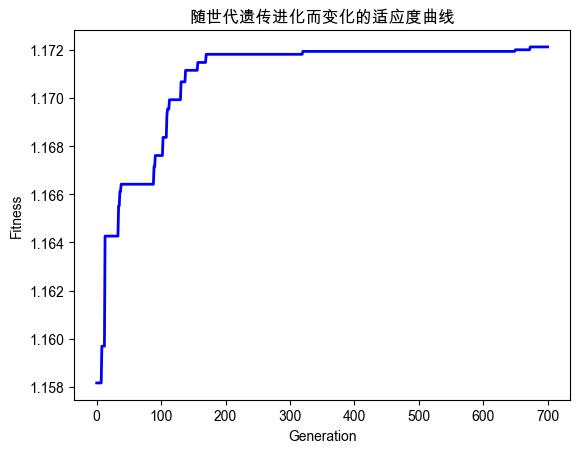

In [37]:
plt.plot(ga_instance.best_solutions_fitness, linewidth=2, color='b')
plt.title('随世代遗传进化而变化的适应度曲线')
plt.xlabel('Generation')
plt.ylabel('Fitness')
plt.show()

### 返回最优解的适应度和index

In [38]:
solution, solution_fitness, solution_idx = ga_instance.best_solution()
print('最优解适应度值 = {solution_fitness}'.format(solution_fitness=solution_fitness))
# print('最优解索引 : {solution_idx}'.format(solution_idx=solution_idx))

最优解适应度值 = 1.1721218831335094


### 给BP神经网络用遗传算法找出的最佳权重进行训练

In [39]:
# 训练集输入
train_inputs = torch.from_numpy(new_X_train.values).float()

# 训练集输出
train_outputs = torch.from_numpy(y_train.values).float()
train_outputs = train_outputs.reshape((train_outputs.shape[0], 1))

In [40]:
# 把遗传算法得到的最优解（权重向量）转换为神经网络模型的权重字典形式 存在 best_solution_weights变量中
best_solution_weights = torchga.model_weights_as_dict(model=model, weights_vector=solution)

# 更新模型的权重
model.load_state_dict(best_solution_weights)

<All keys matched successfully>

In [41]:
# 算训练集损失
# 进行预测 这里 train_predictions输出的是概率 然后用BCEWithLogitsLoss()算了损失

train_predictions = model(train_inputs)
# print('Predictions : n', train_predictions) # 可以打印过程

train_loss = loss_function(train_predictions, train_outputs).detach().numpy()

print('Training Loss:', loss_function(train_predictions, train_outputs).detach().numpy())

Training Loss: 0.6403081


In [42]:
# 算训练集模型准确率
# accuracy = torch.sum(torch.max(predictions, axis=1).indices == data_outputs) / len(data_outputs)
# print('Training and Validation Accuracy: ', accuracy.detach().numpy())

# predicted_labels = (predictions > 0.5).float()
# true_labels = torch.argmax(data_outputs, dim=1)
# accuracy = (predicted_labels == true_labels).sum().item() / len(true_labels)

# a = torch.max(predictions, axis=1)
# b = torch.max(data_outputs, axis=1)

# accuracy = torch.true_divide(torch.sum(a.indices == b.indices), len(data_outputs))

    
# 将概率值转换为包含0和1的预测目标列
train_predicted_labels = (train_predictions >= threshold).int()
train_true_labels = train_outputs
train_accuracy = (train_predicted_labels == train_true_labels).sum().item() / len(train_true_labels)

print('Training Accuracy:', train_accuracy)

Training Accuracy: 0.9421338155515371


### 训练过程中损失和准确率随着epoch（世代进化）增加而变化的图像

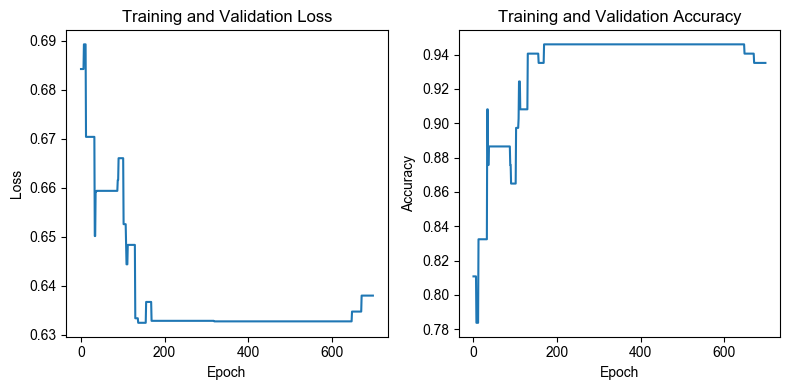

In [43]:
import matplotlib.pyplot as plt

# 绘制损失和准确率随着epoch增加而变化的图像
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.plot(range(len(losses)), losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')

plt.subplot(1, 2, 2)
plt.plot(range(len(accuracies)), accuracies)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.tight_layout()
plt.show()

### GA-BP模型最终在测试集上的表现

In [44]:
# 将测试集转换为张量并调整形状
test_inputs = torch.from_numpy(new_X_test.values).float()

# 将输出数据转换为张量
test_outputs = torch.from_numpy(y_test.values).float()
test_outputs = test_outputs.reshape((test_outputs.shape[0], 1))

In [45]:
# test_inputs

In [46]:
# test_outputs

In [47]:
# 算测试集集损失
# 进行预测 这里 train_predictions输出的是概率 然后用BCEWithLogitsLoss()算了损失

test_predictions = model(test_inputs)
# print('Predictions : n', test_predictions) # 可以打印过程

test_loss = loss_function(test_predictions, test_outputs).detach().numpy()

print('Testing Loss:', loss_function(test_predictions, test_outputs).detach().numpy())

Testing Loss: 0.6268317


In [48]:
# 算测试集准确率 
    
# 将概率值转换为包含0和1的预测目标列
test_predicted_labels = (test_predictions >= threshold).int()
test_true_labels = test_outputs
test_accuracy = (test_predicted_labels == test_true_labels).sum().item() / len(test_true_labels)

print('Testing Accuracy:', test_accuracy)

Testing Accuracy: 0.918918918918919


In [49]:
# 计算测试集 平均精度 ROC曲线下面积 准确率 

average_precision = average_precision_score(test_outputs, test_predictions.detach().numpy()[:, 0])
auc_score = roc_auc_score(test_outputs, test_predictions.detach().numpy()[:, 0])

print('GA-BP')
print('Average Precision:', average_precision)
print('AUROC:', auc_score)
print('Accuracy:', test_accuracy)

GA-BP
Average Precision: 0.8604394023699279
AUROC: 0.9470792365529208
Accuracy: 0.918918918918919


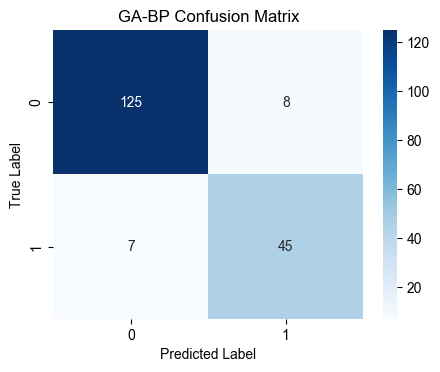

In [50]:
# 混淆矩阵
cm = confusion_matrix(test_true_labels, test_predicted_labels)

plt.figure(figsize=(5, 3.75))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("GA-BP Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

## 其他分类模型预测测试集的表现


KNN
Average Precision: 0.6664697530551189
AUROC: 0.813982070561018
Accuracy: 0.8756756756756757


/Users/ekeulseuji-/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


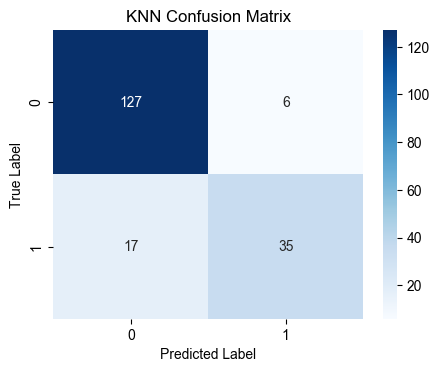

In [51]:
from sklearn.neighbors import KNeighborsClassifier

def KNN(X_train, X_test, y_train, y_test):
    
    # 建立和拟合K近邻模型
    knn = KNeighborsClassifier()
    knn.fit(X_train, y_train)
    
    # 在测试集上进行预测
    y_pred = knn.predict(X_test)
    
    # 看表现
    average_precision = average_precision_score(y_test, y_pred)
    auc_score = roc_auc_score(y_test, y_pred)
    print()
    print('KNN')
    print('Average Precision:', average_precision)
    print('AUROC:', auc_score)
    print("Accuracy:", accuracy_score(y_test, y_pred))  
    
    cm = confusion_matrix(y_test, y_pred)

    plt.figure(figsize=(5, 3.75))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title("KNN Confusion Matrix")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()    
    
KNN(new_X_train, new_X_test, y_train, y_test)


Gradient Boosting
Average Precision: 0.7472663334365462
AUROC: 0.8716743782533255
Accuracy: 0.9081081081081082


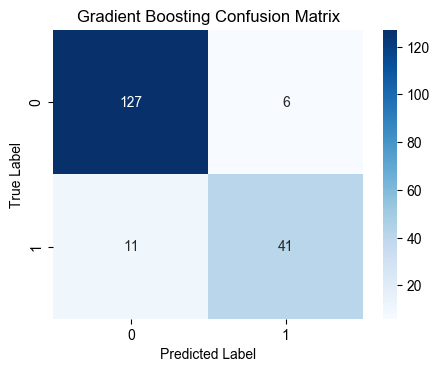

In [52]:
from sklearn.ensemble import GradientBoostingClassifier

def Gradient_Boosting(X_train, X_test, y_train, y_test):
    
    # 建立和拟合梯度提升模型
    gb = GradientBoostingClassifier(random_state=100)
    gb.fit(X_train, y_train)
    
    # 在测试集上进行预测
    y_pred = gb.predict(X_test)
    
    # 看表现
    average_precision = average_precision_score(y_test, y_pred)
    auc_score = roc_auc_score(y_test, y_pred)
    print()
    print('Gradient Boosting')
    print('Average Precision:', average_precision)
    print('AUROC:', auc_score)
    print("Accuracy:", accuracy_score(y_test, y_pred)) 
    
    cm = confusion_matrix(y_test, y_pred)

    plt.figure(figsize=(5, 3.75))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title("Gradient Boosting Confusion Matrix")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()    
    
Gradient_Boosting(new_X_train, new_X_test, y_train, y_test)


Naive Bayes
Average Precision: 0.6762363245969804
AUROC: 0.8725419317524581
Accuracy: 0.8756756756756757


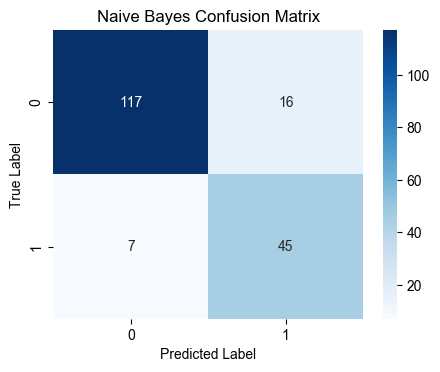

In [53]:
from sklearn.naive_bayes import GaussianNB

def Naive_Bayes(X_train, X_test, y_train, y_test):
    
    # 建立和拟合朴素贝叶斯模型
    nb = GaussianNB()
    nb.fit(X_train, y_train)
    
    # 在验证集上进行预测
    y_pred = nb.predict(X_test)
    
    # 看表现
    average_precision = average_precision_score(y_test, y_pred)
    auc_score = roc_auc_score(y_test, y_pred)
    print()
    print('Naive Bayes')
    print('Average Precision:', average_precision)
    print('AUROC:', auc_score)
    print("Accuracy:", accuracy_score(y_test, y_pred)) 
    
    cm = confusion_matrix(y_test, y_pred)

    plt.figure(figsize=(5, 3.75))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title("Naive Bayes Confusion Matrix")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()    
    
Naive_Bayes(new_X_train, new_X_test, y_train, y_test)


Neural Network
Average Precision: 0.7463617463617463
AUROC: 0.8775303643724697
Accuracy: 0.9081081081081082


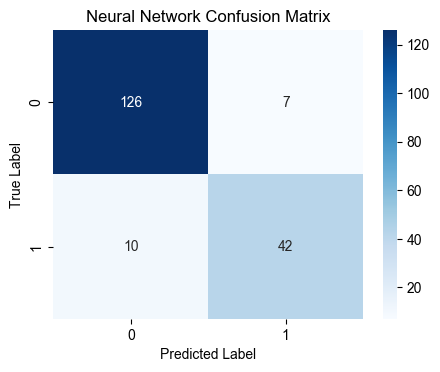

In [54]:
from sklearn.neural_network import MLPClassifier

def Neural_Network(X_train, X_test, y_train, y_test):
    
    # 建立和拟合神经网络模型
    nn = MLPClassifier(random_state=100, max_iter=1000)
    nn.fit(X_train, y_train)
    
    # 在验证集上进行预测
    y_pred = nn.predict(X_test)
    
    # 看表现
    average_precision = average_precision_score(y_test, y_pred)
    auc_score = roc_auc_score(y_test, y_pred)
    print()
    print('Neural Network')
    print('Average Precision:', average_precision)
    print('AUROC:', auc_score)
    print("Accuracy:", accuracy_score(y_test, y_pred))  
    
    # import pydotplus
    # from sklearn.tree import export_graphviz

    # 绘制网络结构图（不想画了）
    # fig, ax = plt.subplots()
    # for i in range(len(nn.coefs_)):
    #    layer_weights = nn.coefs_[i]
    #    for j in range(layer_weights.shape[1]):
    #        ax.arrow(i, j, i+1, j, head_width=0.1, head_length=0.1, fc='black', ec='black')
    # ax.set_xlabel('Layer')
    # ax.set_ylabel('Neuron')
    # ax.set_title('MLP Network Structure')
    # plt.show()
    
    cm = confusion_matrix(y_test, y_pred)

    plt.figure(figsize=(5, 3.75))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title("Neural Network Confusion Matrix")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()    
    
Neural_Network(new_X_train, new_X_test, y_train, y_test)